# This JupyterNotebook was taken care by: `Andrea Filiberto Lucas` (0279704L)

## Preamble
### Setup and Library Importation
The provided code snippet bellow, creates the initial environment for a Jupyter Notebook session. It begins by importing modules required for the tasks ahead, such as `ImageDataGenerator` from `TensorFlow for data augmentation`, `os` for operating system interaction, `numpy` for numerical operations, `matplotlib.pyplot` for visualisation, and `shutil` for high-level file operations. It also imports `re` for regular expressions, `pandas` for data manipulation and analysis, and `seaborn` for statistical data visualisation, which expands the environment's functionality for a variety of data analysis tasks.

In [52]:
# Import all the necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator for data augmentation  # type: ignore 
from PIL import Image  # Importing the Image module from the Python Imaging Library (PIL) for image manipulation.
import os  # Import os module for interacting with the operating system
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import shutil  # Module for high-level file operations
import re  # Importing the 're' module for regular expressions.
import pandas as pd  # Importing the 'pandas' library and aliasing it as 'pd' for convenience.
import seaborn as sns  # Importing the 'seaborn' library and aliasing it as 'sns' for convenience.

Furthermore, the `installer checker` block ensures that the necessary `libraries are installed locally`. It looks for `TensorFlow and scikit-image` (for ssim metric) and installs them if they're not available. This ensures that the notebook can operate seamlessly regardless of the user's local environment, allowing for a smooth and uninterrupted workflow.

In [53]:
# Check if TensorFlow is installed, if not, install it
try:
    import tensorflow as tf  # Import TensorFlow library for deep learning tasks
except ImportError:
    !pip install tensorflow

# Check if scikit-image is installed, if not, install it
try:
    from skimage.metrics import structural_similarity as ssim  # Import SSIM metric from scikit-image for image comparison
except ImportError:
    !pip install scikit-image

### Setting Up Directory Structure
This section of code creates a `directory structure` for the project. It starts with defining a base directory, `base_dir`, which is set as the parent directory ('..'). Then it generates subdirectories for various purposes within the project. Specifically, it creates `three directories`: one for the COTS dataset (`cots_dataset_dir`), one for TensorFlow results (`results_base_dir`), and one for metrics (`metrics_dir`). Finally, it checks to see if these directories already exist and creates them if they do not.

In [54]:
# Define base directory
base_dir = os.path.abspath('..')

# Define subdirectories
cots_dataset_dir = os.path.join(base_dir, '0. COTS_Img')
results_base_dir = os.path.join(base_dir, '3. Results', 'TensorFlow')
metrics_dir = os.path.join(results_base_dir, '0. Metrics')

# Create directories if they do not exist
try:
    for directory in [results_base_dir, metrics_dir]:
        os.makedirs(directory, exist_ok=True)
except OSError as e:
    print(f"Error creating directories: {e}")

### Selected Images for COTS Dataset
This code snippet gets a list of image files from a given directory and displays them in a subplot layout. Each image is loaded, displayed (without axes), and identified by its filename, excluding the '.jpeg' extension. The resulting visualization provides an overview of the images selected from the COTS (Common Objects of a Traveling Scientist) dataset.

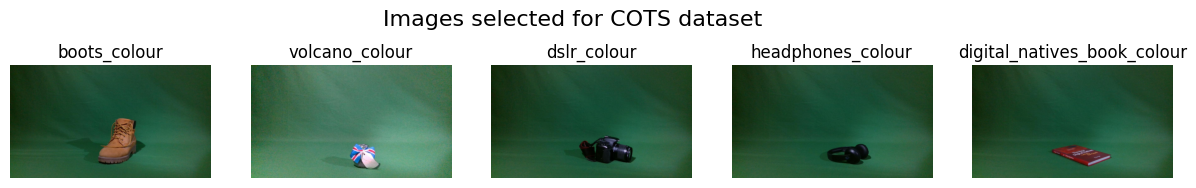

In [55]:
# Get list of image files
image_files = [f for f in os.listdir(cots_dataset_dir) if f.endswith('.jpeg')]

# Display images
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))
for i, image_file in enumerate(image_files):
    image_path = os.path.join(cots_dataset_dir, image_file)
    image = Image.open(image_path)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(image_file[:-5])  # Removing the '.jpeg' extension for labeling

# Adjust spacing between title and images
plt.subplots_adjust(top=1.4)

plt.suptitle("Images selected for COTS dataset", fontsize=16)
plt.show()

## Defining Data Augmentation Techniques
In the following segment, the code handles data augmentation strategies using TensorFlow's `ImageDataGenerator`. These techniques are critical for increasing the diversity and resilience of the training dataset. The dataset becomes more versatile by incorporating a variety of transformations such as `rotation`, `width and height shifting`, `shear`, `zooming`, and `horizontal flipping`. Each transformation specifies the degree of alteration, providing precise control over augmentation intensity. Finally, the `fill_mode` directive specifies the pixel interpolation strategy, which ensures that newly generated data is seamlessly integrated. This comprehensive approach ensures the creation of a diverse and robust dataset, which strengthens the efficacy of future machine learning efforts.

In [56]:
# Define data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,              # Rotation
    width_shift_range=0.1,          # Width shift
    height_shift_range=0.1,         # Height shift
    shear_range=0.2,                # Shear
    zoom_range=0.2,                 # Zoom
    horizontal_flip=True,           # Horizontal flip
    fill_mode='nearest'             # Fill mode
)

## Quantifying Structural Similarity
`Calculate_ssim` is an important function for determining the structural similarity of two images. Initially, it ensures that the input images are represented as `NumPy arrays` before converting them to grayscale, which is required for comparative analysis. The RGB images are then converted to grayscale using TensorFlow's image processing capabilities. These grayscale representations are then converted into NumPy arrays for use in the `structural similarity (SSIM) metric` calculation. The SSIM score, calculated with the ssim function from the `scikit-image` library, quantifies the similarity of the grayscale images. The SSIM calculation is fine-tuned using parameters such as full and data_range, which allows for more accurate assessment. Finally, the function returns the SSIM score, which provides valuable information about the structural similarity of the input images. This process is used in a variety of computer vision applications, including image quality assessment, object recognition, and more. <br><br>
<span style="color:green; font-weight:bold;">The higher the SSIM score, the closer the structural similarity between the two images.</span>

In [57]:
def calculate_ssim(image1, image2):
    # Ensure images are NumPy arrays and convert to grayscale
    image1_np = tf.keras.preprocessing.image.img_to_array(image1).astype('float32') / 255.0
    image2_np = tf.keras.preprocessing.image.img_to_array(image2).astype('float32') / 255.0
    
    # Convert RGB images to grayscale
    image1_gray = tf.image.rgb_to_grayscale(image1_np)
    image2_gray = tf.image.rgb_to_grayscale(image2_np)
    
    # Convert grayscale TensorFlow tensors to NumPy arrays
    image1_gray_np = image1_gray.numpy().squeeze()
    image2_gray_np = image2_gray.numpy().squeeze()
    
    # Calculate SSIM
    score, _ = ssim(image1_gray_np, image2_gray_np, full=True, data_range=image2_gray_np.max() - image2_gray_np.min())
    return score

## Data Augmentation & Metric Calculation
This extensive main section handles the augmentation of images from a given dataset while also computing comparative metrics. The script begins by initialising augmentation procedures for each image in the dataset, creating a directory structure to hold the augmented images and their metrics. It starts by loading the image, converting it to a NumPy array, and then saving the original image. Augmentation is then performed iteratively, yielding a series of modified images using the defined augmentation techniques. The script uses the previously defined `calculate_ssim` function to determine the structural similarity between each augmented image and the original. Both the augmented images and their associated SSIM metrics are saved in their respective folders (locally).
<br><br>
In addition, the script creates a `comparative plot of the original and augmented images`, allowing for qualitative assessment. Each plot is saved as a reference. In addition, the SSIM metrics are aggregated and saved to a text file for further analysis. 
<br><br>
Finally, a `confirmation message is printed` to the console indicating that the augmented images and SSIM metrics were successfully saved, improving user interaction and workflow transparency.

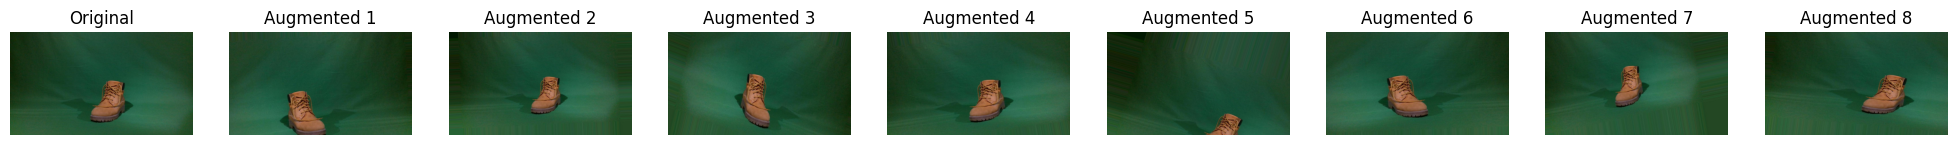

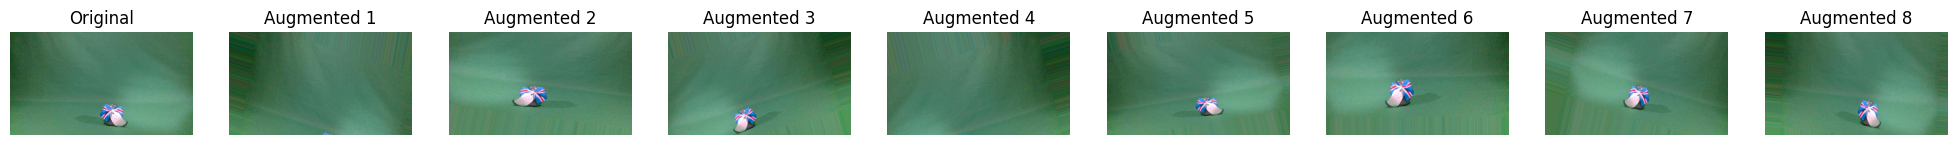

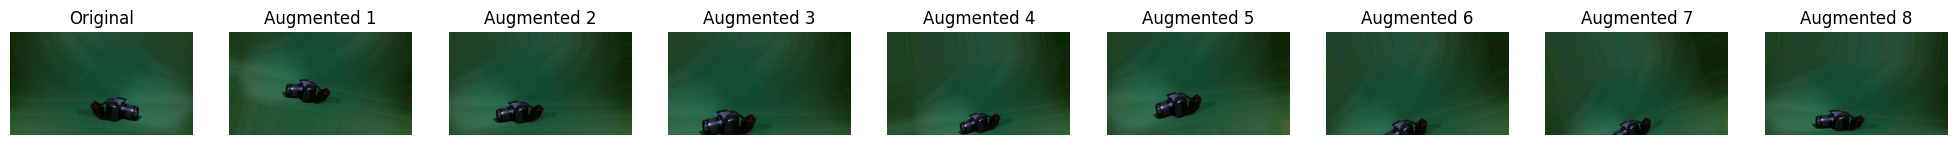

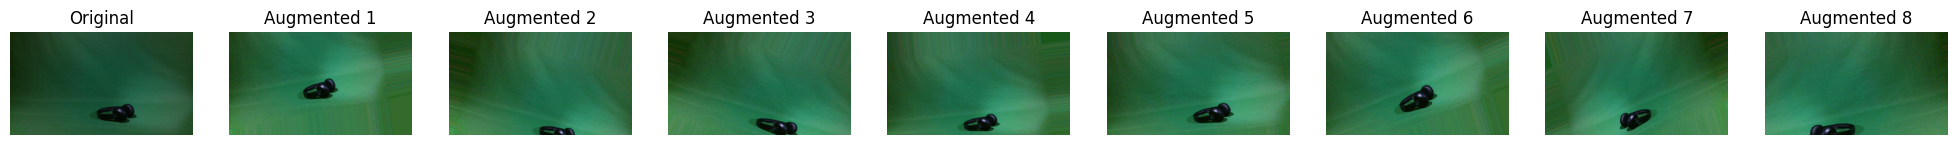

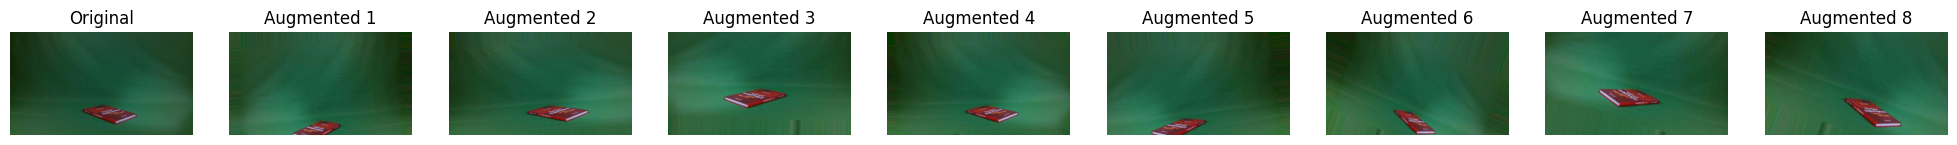

Augmented images successfully saved to /Users/afl/Documents/Uni/Year 2/Lectures/SEM2/CV/Group Project/Part B/Question 3/3. Results/TensorFlow
SSIM metrics successfully saved to /Users/afl/Documents/Uni/Year 2/Lectures/SEM2/CV/Group Project/Part B/Question 3/3. Results/TensorFlow/0. Metrics/0. ssim_metrics.txt


In [58]:
# Generate augmented images and calculate comparative metrics
metrics = []

for filename in os.listdir(cots_dataset_dir):
    img_path = os.path.join(cots_dataset_dir, filename)
    img = tf.keras.preprocessing.image.load_img(img_path)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    original_image = x.squeeze(axis=0)
    
    # Create or clean the directory for each image's augmented set
    image_dir = os.path.join(results_base_dir, filename.split('.')[0])
    if os.path.exists(image_dir):
        shutil.rmtree(image_dir)  # Delete existing content
    os.makedirs(image_dir, exist_ok=True)
    
    # Save the original image
    original_image_path = os.path.join(image_dir, f'1. original_{filename}')
    tf.keras.preprocessing.image.save_img(original_image_path, original_image)
    
    augmented_images = []
    i = 1  # Start numbering from 1
    for batch in datagen.flow(x, batch_size=1):
        augmented_image = batch.squeeze(axis=0)
        ssim_score = calculate_ssim(original_image, augmented_image)
        metrics.append((filename, ssim_score))
        
        # Save the augmented image with the current value of i
        aug_filename = f"{filename.split('.')[0]}_augmented_{i}.jpeg"
        aug_image_path = os.path.join(image_dir, aug_filename)
        tf.keras.preprocessing.image.save_img(aug_image_path, augmented_image)
        
        augmented_images.append(aug_image_path)
        
        i += 1
        if i > 8:  # Stop after 8 augmented images
            break
    
    # Plot the original and augmented images
    fig, axes = plt.subplots(1, 9, figsize=(25, 5))
    axes[0].imshow(original_image.astype('uint8'))
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    for j, aug_img_path in enumerate(augmented_images):
        aug_img = tf.keras.preprocessing.image.load_img(aug_img_path)
        aug_img = tf.keras.preprocessing.image.img_to_array(aug_img).astype('uint8')
        axes[j + 1].imshow(aug_img)
        axes[j + 1].set_title(f'Augmented {j+1}')
        axes[j + 1].axis('off')
    
    # Save the plot
    plot_path = os.path.join(image_dir, '0. augmentation_cmp.png')
    plt.savefig(plot_path)
    plt.show()
    plt.close(fig)  # Close the figure to release memory
    
# Save SSIM metrics to a file
metrics_file = os.path.join(metrics_dir, '0. ssim_metrics.txt')

# Open the file in write mode
with open(metrics_file, 'w') as f:
    previous_filename = None
    augmentation_index = 1
    for filename, ssim_score in metrics:
        # Add a newline when transitioning to a new image
        if previous_filename and filename != previous_filename:
            f.write('\n')
            augmentation_index = 1  # Reset augmentation index for new image
        
        # Construct the augmented filename
        augmented_filename = f"{filename.split('.')[0]}_augmented_{augmentation_index}.jpeg"
        
        # Write the SSIM metric for the current image
        f.write(f'{augmented_filename}: SSIM = {ssim_score:.4f}\n')
        
        previous_filename = filename
        augmentation_index += 1

# Printing a confirmation message (in bold and green)
print(f'\033[1;32mAugmented images successfully saved to {results_base_dir}\033[0m')
print(f'\033[1;32mSSIM metrics successfully saved to {metrics_file}\033[0m')

## Visualizing SSIM Scores
This final code block examines the `SSIM scores` for augmented images. Initially, it loads SSIM metrics from a specified file using `panda`s, parsing filenames and SSIM scores separated by colons. It then extracts the numeric portion of SSIM scores from the 'SSIM' column using a regex pattern. Following data preparation, three different visualization techniques are used to understand the distribution of SSIM scores. First, a `box plot` is created to depict `quartiles and outliers`. Then, a `violin plot`, which combines a `box plot` and a `kernel density plot`, provides a complete picture of the distribution. Finally, a `histogram shows the frequency distribution of SSIM scores` in predefined bins. The resulting figures are displayed with the `matplotlib` and `seaborn` libraries.

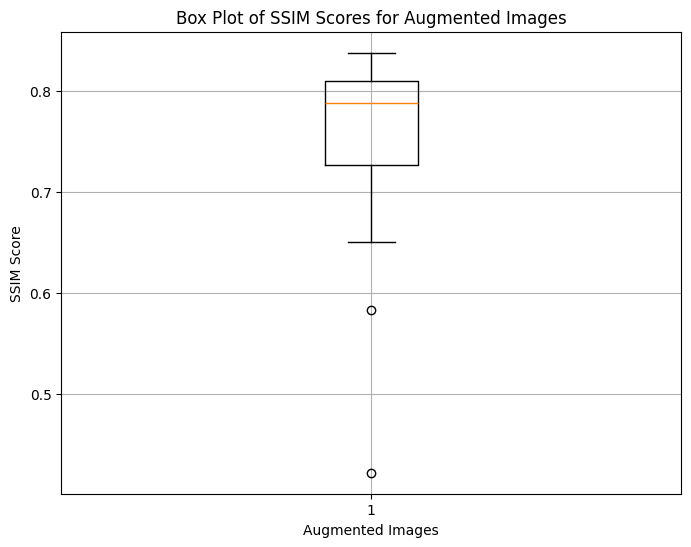

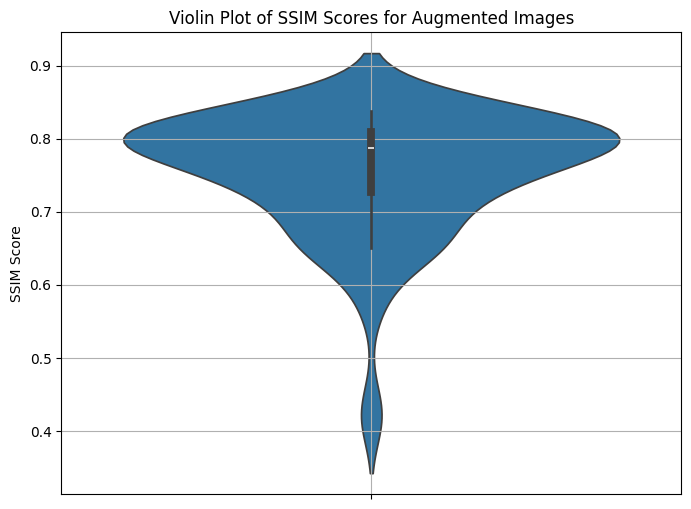

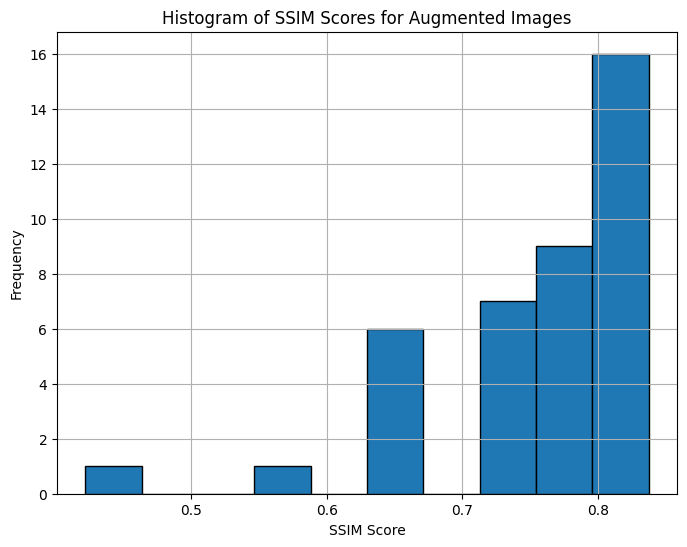

In [59]:
# Load SSIM metrics from the specified file using pandas
metrics_df = pd.read_csv(metrics_file, sep=':', header=None, names=['Filename', 'SSIM'])

# Extract numerical part of SSIM scores from the 'SSIM' column
metrics_df['SSIM'] = metrics_df['SSIM'].apply(lambda x: float(re.search(r'\d+\.\d+', x).group()))

# Visualize the distribution of SSIM scores using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(metrics_df['SSIM'])
plt.title('Box Plot of SSIM Scores for Augmented Images')
plt.xlabel('Augmented Images')
plt.ylabel('SSIM Score')
plt.grid(True)
plt.savefig(os.path.join(metrics_dir, 'box_plot_ssim.png'))  # Save the box plot
plt.show()

# Visualize the distribution of SSIM scores using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=metrics_df['SSIM'])
plt.title('Violin Plot of SSIM Scores for Augmented Images')
plt.ylabel('SSIM Score')
plt.grid(True)
plt.savefig(os.path.join(metrics_dir, 'violin_plot_ssim.png'))  # Save the violin plot
plt.show()

# Visualize the distribution of SSIM scores using a histogram
plt.figure(figsize=(8, 6))
plt.hist(metrics_df['SSIM'], bins=10, edgecolor='k')
plt.title('Histogram of SSIM Scores for Augmented Images')
plt.xlabel('SSIM Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(metrics_dir, 'histogram_ssim.png'))  # Save the histogram
plt.show()

The above three visualisations provide a thorough examination of SSIM scores for augmented images.

The first box plot, summarises the SSIM score distribution by emphasising the median, quartiles, and possible outliers. This plot shows that most SSIM scores are clustered around 0.8, with a few lower outliers around 0.5, indicating a high degree of similarity in the majority of augmented images, though there are some exceptions.

The second plot, a violin plot, combines elements of a box plot and a density plot to depict the distribution's shape and spread. This plot emphasises that the SSIM scores are densely packed around 0.8, with a smooth distribution that tapers off towards lower scores, demonstrating both the concentration and variability of the scores.

The third plot, a histogram, shows the frequency distribution of the SSIM scores. The majority of scores fall between 0.7 and 0.8, with fewer images scoring less than 0.7. This histogram confirms the findings from the previous plots, indicating that while the majority of augmented images maintain high structural similarity, a small subset exhibits significant deviation.